In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [5]:
from google.colab import files
uploaded=files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [6]:
tt=pd.read_csv('Titanic_train.csv')
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
tt.drop(['PassengerId','Name','Ticket','Cabin','Age'],axis=1,inplace=True)

In [9]:
tt

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [10]:
tt=pd.get_dummies(tt,columns=['Sex','Embarked'],dtype=int)

In [11]:
tt

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0,1,0,0,1
887,1,1,0,0,30.0000,1,0,0,0,1
888,0,3,1,2,23.4500,1,0,0,0,1
889,1,1,0,0,30.0000,0,1,1,0,0


In [12]:
tt.corr()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.070941,0.063036,-0.166603,-0.125722,0.125722,-0.778359,-0.496624,1.000000


In [13]:
tt.isnull().sum()

Survived      0
Pclass        0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

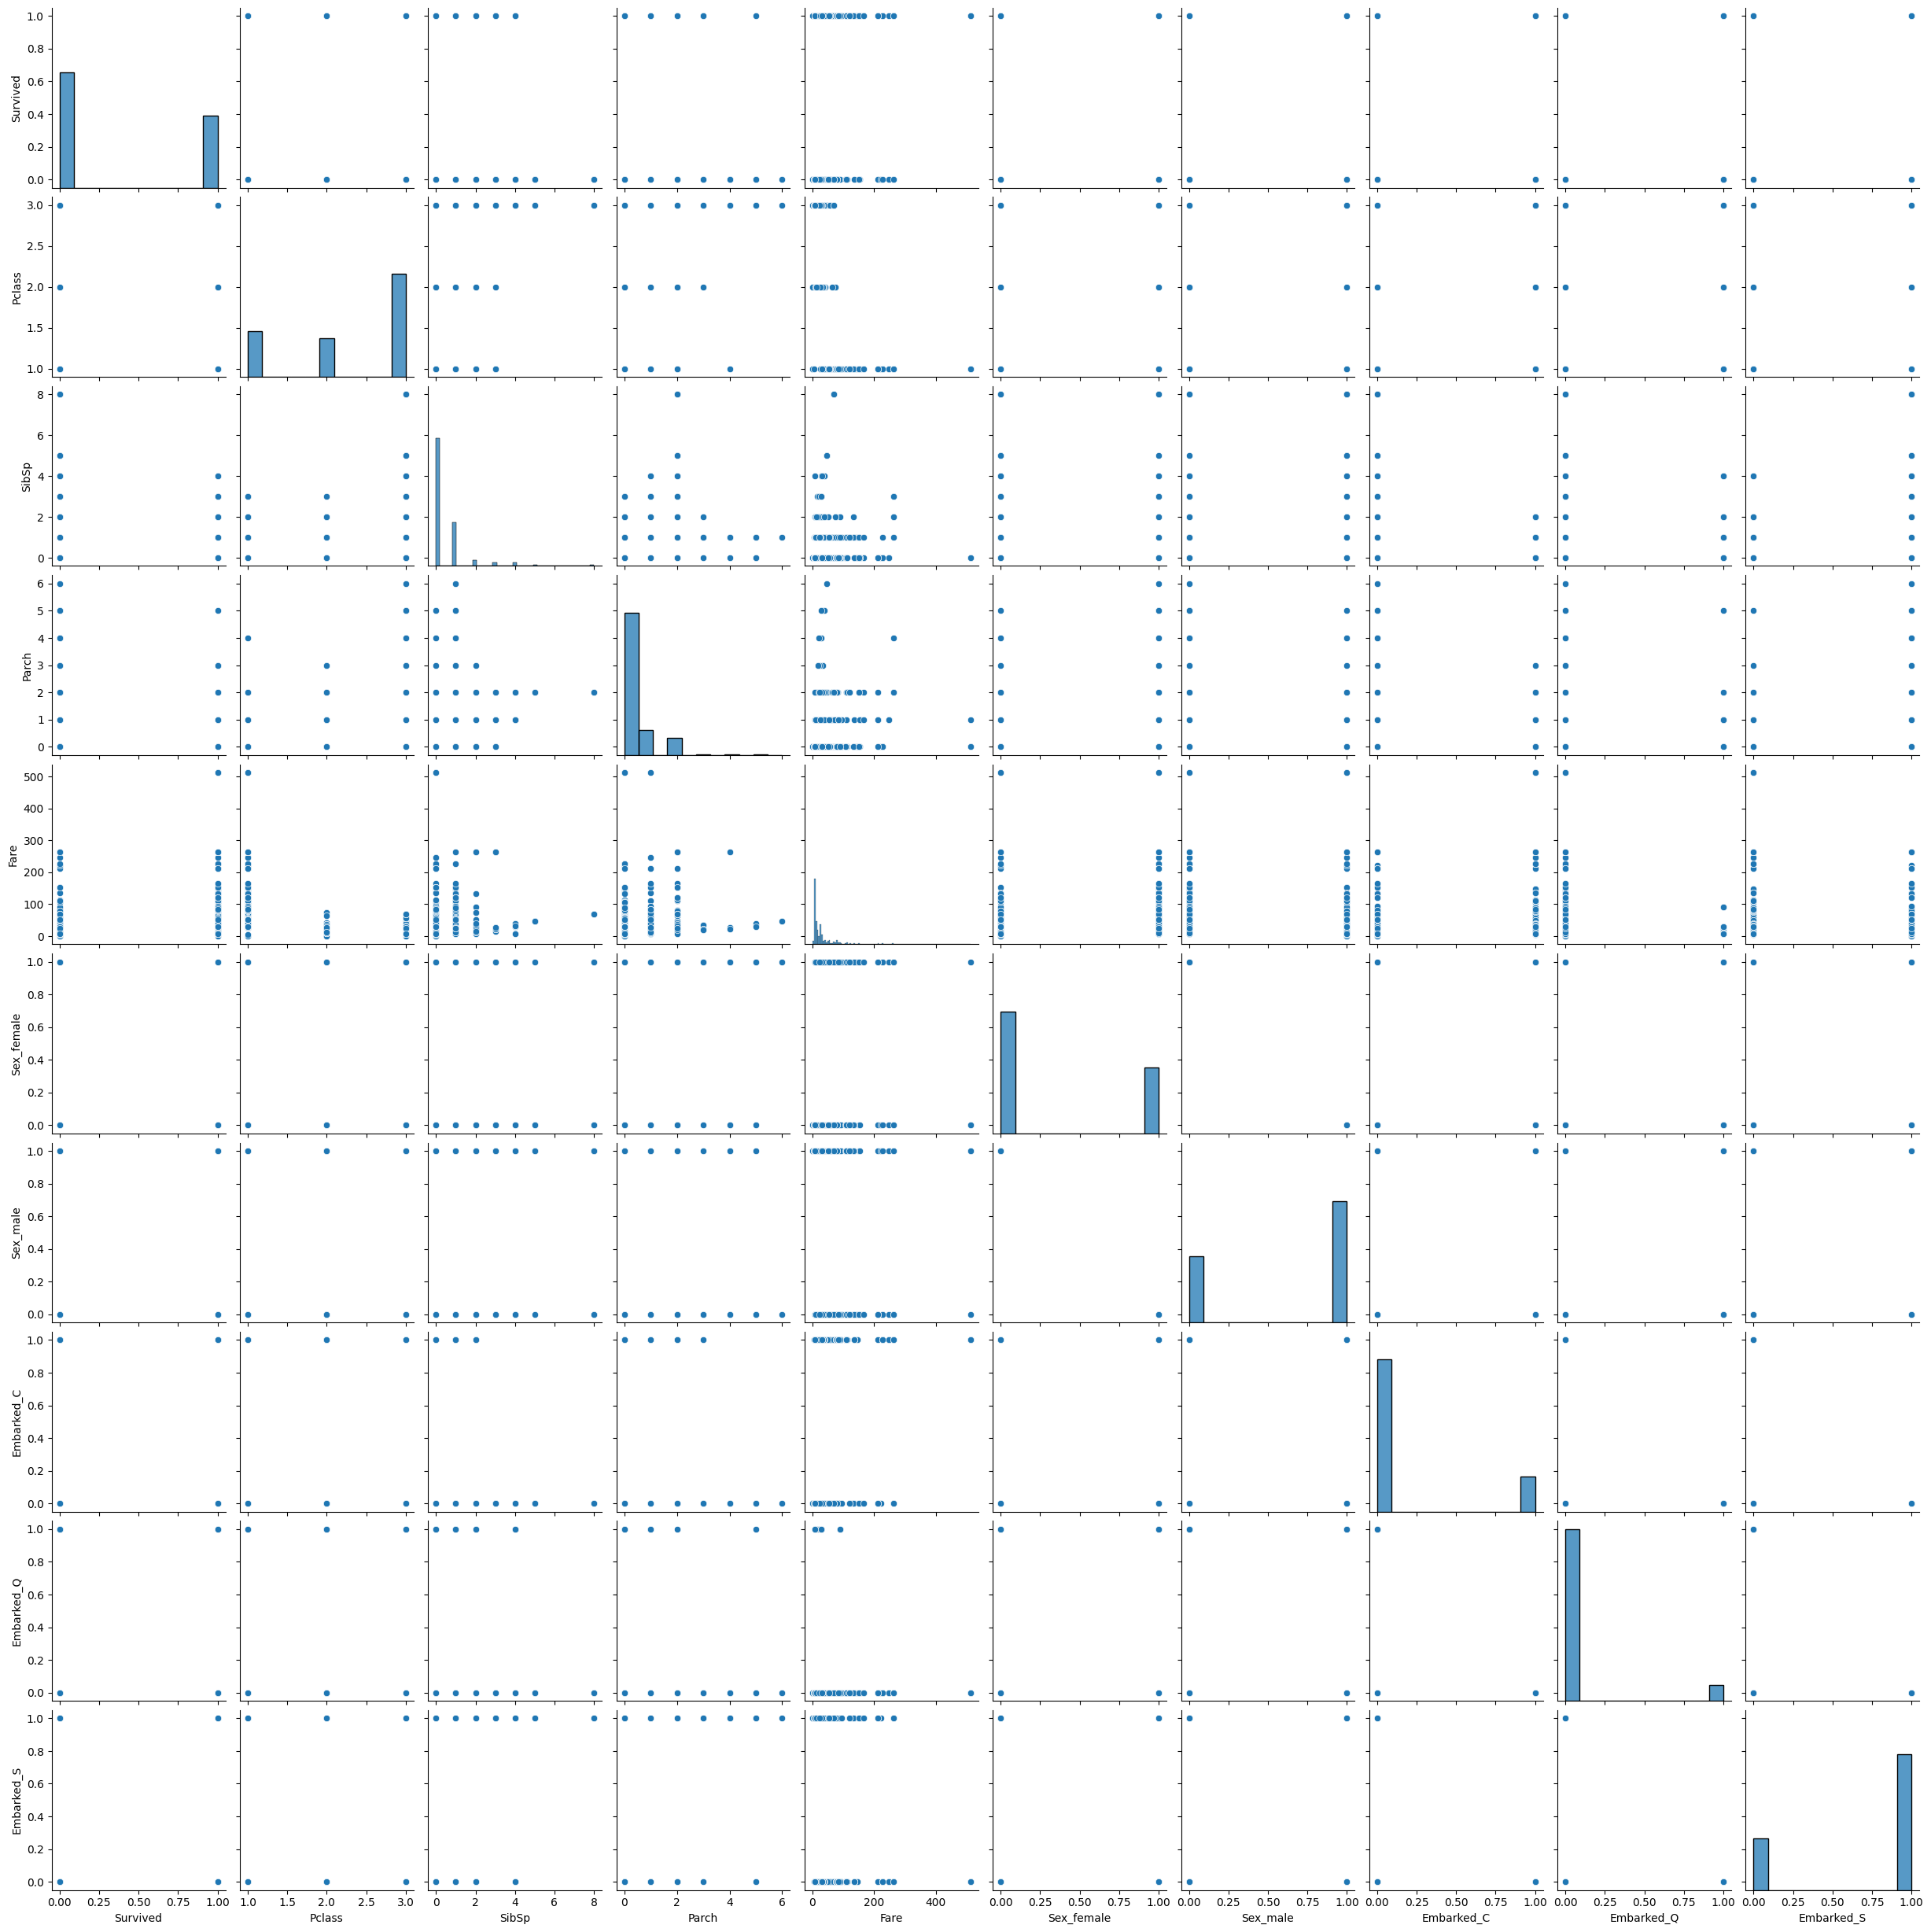

In [18]:
sns.pairplot(tt)

In [42]:
# Dividing our data into input and output variables
X = tt.iloc[:,1:]    #Object for Independent Variables
Y = tt.iloc[:,0]     #Object for the Dependent Variable

In [43]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
classifier.coef_

array([[-0.79599072, -0.23619006, -0.07020747,  0.00293029,  1.780916  ,
        -0.90310398,  0.4894334 ,  0.30171189,  0.02593256]])

In [45]:
Beta_Coefficients=pd.Series(classifier.coef_[0])
Beta_Coefficients

0   -0.795991
1   -0.236190
2   -0.070207
3    0.002930
4    1.780916
5   -0.903104
6    0.489433
7    0.301712
8    0.025933
dtype: float64

In [46]:
Coef_df= pd.DataFrame({'Variables': ['Pclass','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'], 'Beta Coefficients': Beta_Coefficients})
Coef_df

,Variables,Beta Coefficients
0,Pclass,-0.795991
1,SibSp,-0.236190
2,Parch,-0.070207
3,Fare,0.002930
4,Sex_female,1.780916
5,Sex_male,-0.903104
6,Embarked_C,0.489433
7,Embarked_Q,0.301712
8,Embarked_S,0.025933


In [47]:
import numpy as np
np.set_printoptions(suppress=True)        # Left one is talking obout 0's probability
pred_prob=classifier.predict_proba(X)     # Right one is talking about 1's probability
pred_prob

array([[0.91662636, 0.08337364],
       [0.07379733, 0.92620267],
       [0.37172578, 0.62827422],
       ...,
       [0.45172386, 0.54827614],
       [0.50975659, 0.49024341],
       [0.86806224, 0.13193776]])

In [48]:
pred_prob=pd.DataFrame(pred_prob)     # there the probability cut off value is 0.05,if the probanility value is beyond 0.05,then it will show 0,else 1
pred_prob
pred_prob['y_pred_manual']=pred_prob[1].apply(lambda x: 0 if x<0.5 else 1)
pred_prob

,0,1,y_pred_manual
0,0.916626,0.083374,0
1,0.073797,0.926203,1
2,0.371726,0.628274,1
3,0.117846,0.882154,1
4,0.896491,0.103509,0
...,...,...,...
886,0.793858,0.206142,0
887,0.101425,0.898575,1
888,0.451724,0.548276,1
889,0.509757,0.490243,0


0=SURVIVED & 1=NOT SURVIVED

So the probabilities on the left side in the array, are in favour of outcome '0', and the probabilities on the right are in favour of outcome '1'

So if we refer to the probabilities on the right (outcome '1'), for observations where this probability is greater than 0.5, the model will categorize that observation with label 1, and for observations where the right hand side probabilities is lesser than 0.5, model will label them as outcome '0'

In [60]:
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [62]:
y_pred_df= pd.DataFrame({'actual': Y,  'predictions': classifier.predict(X)})
y_pred_df

,actual,predictions
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


Actual = 0 & Prediction = 0 True Negatives (TN)

Actual = 1 & Prediction = 1 True Positives (TP)

Actual = 0 & Prediction = 1 False Positives (FP)

Actual = 1 & Prediction = 0 False Negative (FN)

In [63]:
TP=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==1)])
TN=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==0)])
FP=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==1)])
FN=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==0)])
print('True Positives', TP)
print('True Negatives', TN)           #HERE WE CAN THE COUNT OF ALL
print('False Positives', FP)
print('False Negatives', FN)

True Positives 234
True Negatives 477
False Positives 72
False Negatives 108


In [64]:
# HERE WE ARE CHECKING THE ACCURACY OF MODEL AND FINDING THE MODEL PREDICTION VALUES MATCHES ACTUAL VALUES IN THE DATA
print(len(y_pred_df[y_pred_df['actual']==y_pred_df['predictions']]))
print(len(y_pred_df))
len(y_pred_df[y_pred_df['actual']==y_pred_df['predictions']])/len(y_pred_df)

711
891


0.797979797979798

In [65]:
# NOT MATCHING AND HOW MUCH IS NOT ACCURACY
print(len(y_pred_df[y_pred_df['actual'] != y_pred_df['predictions']]))
print(len(y_pred_df))
len(y_pred_df[y_pred_df['actual']!=y_pred_df['predictions']])/len(y_pred_df)

180
891


0.20202020202020202

In [66]:
classifier.score(X,Y)

0.797979797979798

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,Y)
print(cm)

[[477 108]
 [ 72 234]]


In [68]:
#Checking for Sensitivity/Recall
Sensitivity=(TP/(TP+FN))
((234)/(234+108))*100
print('Sensitivity',round(Sensitivity,2))

Sensitivity 0.68


In [55]:
#Checking for Precision
Precision=(TP/(TP+FP))
((395)/(395+197))*100
print('Precision',round(Precision,2))

Precision 0.76


In [56]:
#Checking for F-Score
F_Score=(2*Precision*Sensitivity)/(Precision+Sensitivity)
print('F_Score',round(F_Score,2))

F_Score 0.72


# **ROC(RECIEVER OPERATING CURVE)**

0.7765314926660913


Text(0, 0.5, 'True Positive Rate / Sensitivity')

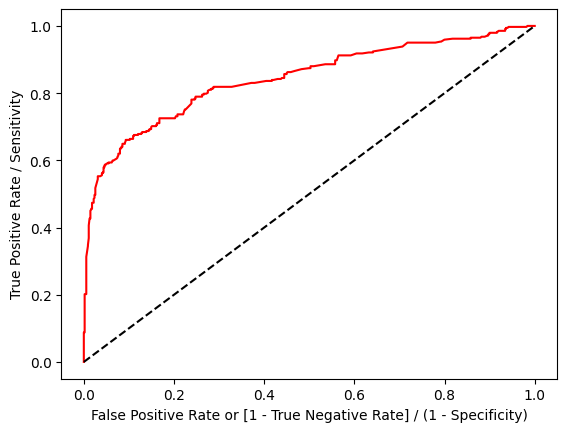

In [69]:
from sklearn.metrics import roc_curve                                         # AUC= AREA UNDER CURVE
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')